# Свистунов Андрей БИВ234
## Домашняя работа, дедлайн до 14 июня
Дан файл, в котором указан рост студентов.

- построить гистограмму;
- выборочное среднее;
- выборочную дисперсию;
- построить интервальную оценку для математического ожидания при уровне надежности 0.98. Предположим, что рост студентов подчинен нормальному распределению с найденным средним и дисперсией.
-  построить функцию плотности вероятности на том же графике, что и гистограмма.

In [1]:
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "Rost.dat"

with open(filename, "r", encoding="utf-8") as file:
    data = [float(line.strip()) for line in file]
data = np.array(data)
data

array([179.163, 166.702, 181.815, 167.206, 174.854, 169.738, 168.47 ,
       180.236, 176.722, 176.455, 177.344, 159.89 , 170.695, 175.939,
       164.106, 183.037, 176.173, 168.189, 174.939, 187.151, 172.712,
       188.08 , 171.395, 164.81 , 175.362, 170.083, 172.432, 176.225,
       167.631, 181.852, 182.829, 166.862, 161.826, 178.178, 175.241,
       174.202, 168.929, 180.279, 171.381, 175.875, 176.935, 175.604,
       183.044, 177.033, 179.088, 173.497, 169.5  , 170.494, 168.836,
       179.376, 168.221, 174.37 , 186.996, 174.862, 169.347, 183.055,
       172.964, 170.237, 171.735, 179.53 , 172.084, 170.05 , 165.797,
       174.208, 173.33 , 174.641, 180.662, 184.155, 174.495, 168.282,
       173.383, 182.816, 182.424, 166.837, 168.028, 179.424, 179.151,
       165.347, 172.089, 180.628, 170.822, 181.821, 172.819, 177.507,
       184.442, 178.22 , 171.077, 172.183, 169.296, 179.714, 172.953,
       168.173, 169.218, 173.257, 174.993, 169.071, 179.644, 173.757,
       174.521, 166.

### Гистограмма

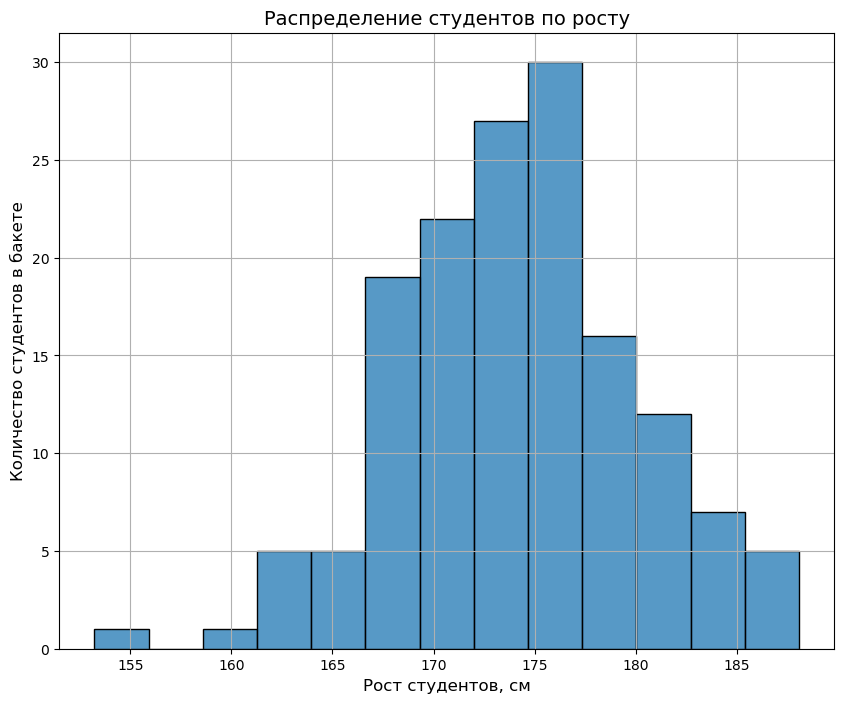

In [3]:
n_buckets = int(np.ceil(np.sqrt(len(data))))

plt.figure(figsize=(10, 8))
sns.histplot(data, bins=n_buckets)
plt.grid()
plt.xlabel("Рост студентов, см", fontsize=12)
plt.ylabel("Количество студентов в бакете", fontsize=12)
plt.title("Распределение студентов по росту", fontsize=14);

### Выборочное среднее и дисперсия

In [4]:
mean_data = data.mean()
variance_data = data.var(ddof=1)
print(f"Выборочное среднее: {mean_data:.3f}\nВыборочная диспесия: {variance_data:.3f}")

Выборочное среднее: 174.115
Выборочная диспесия: 34.823


### Интервальная оценка для матожидания

In [5]:
alpha = 0.98
t_alpha = t.ppf((1 + alpha) / 2, df=len(data) - 1)
min_value = mean_data - np.sqrt(variance_data / len(data)) * t_alpha
max_value = mean_data + np.sqrt(variance_data / len(data)) * t_alpha

print(f"Интервальная оценка матожидания роста студентов при уровне надежности 98%: [{min_value:.3f}, {max_value:.3f}]")

Интервальная оценка матожидания роста студентов при уровне надежности 98%: [172.982, 175.248]


### Гистограмма + Функция плотности вероятности

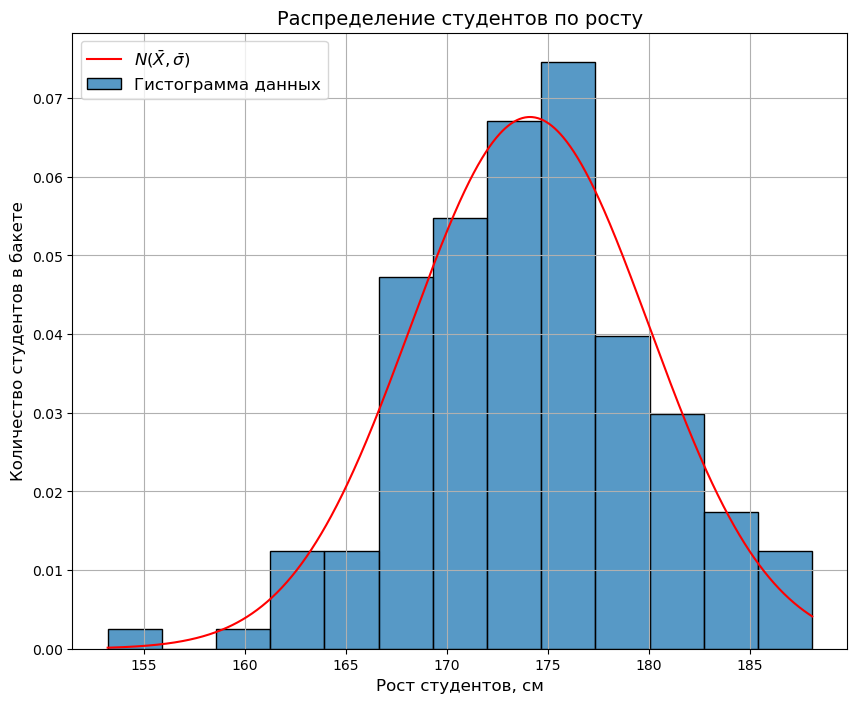

In [6]:
x_grid = np.linspace(min(data), max(data), 1000)
pdf_estimated = norm.pdf(x_grid, loc=mean_data, scale=np.sqrt(variance_data))

plt.figure(figsize=(10, 8))
sns.histplot(data, bins=n_buckets, stat="density", label='Гистограмма данных')
plt.plot(x_grid, pdf_estimated, color='red', label='$N(\\bar{X}, \\bar{\\sigma})$')
plt.xlabel("Рост студентов, см", fontsize=12)
plt.ylabel("Количество студентов в бакете", fontsize=12)
plt.title("Распределение студентов по росту", fontsize=14);
plt.legend(fontsize=12)
plt.grid()
plt.show()